1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (1797, 65)
   Nombre de classes : 10 (chiffres 0 à 9)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 5760

4. Nettoyage des données...
   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives (premiers 10 pixels) :
       pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.308729     5.216755    11.806678    11.795548   
std        0.0     0.888650     4.629106     4.146953     4.201472   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     5.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000 

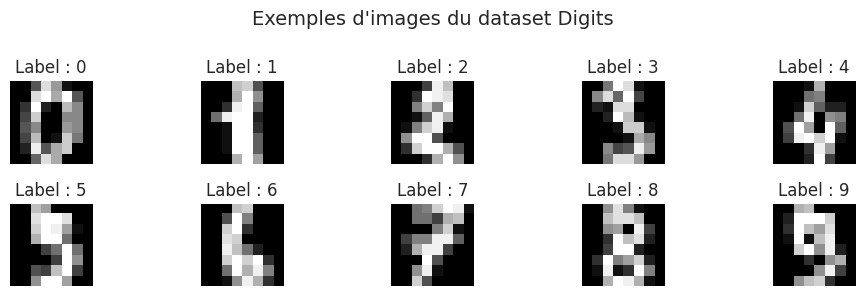

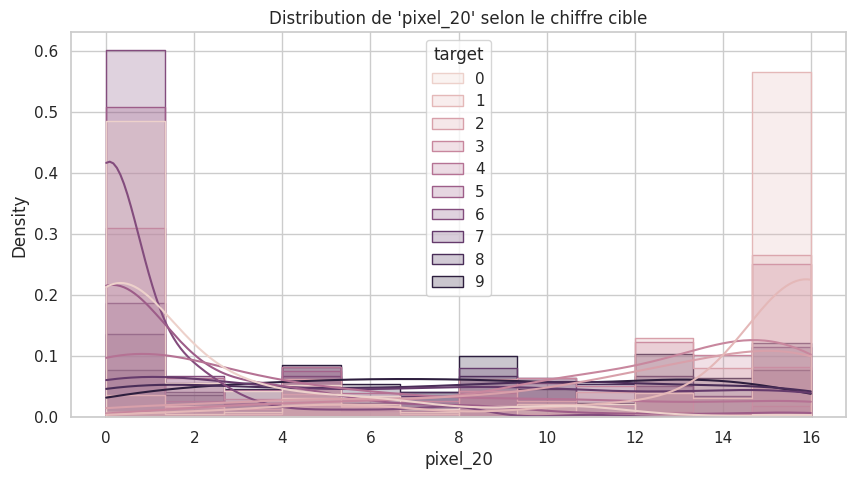

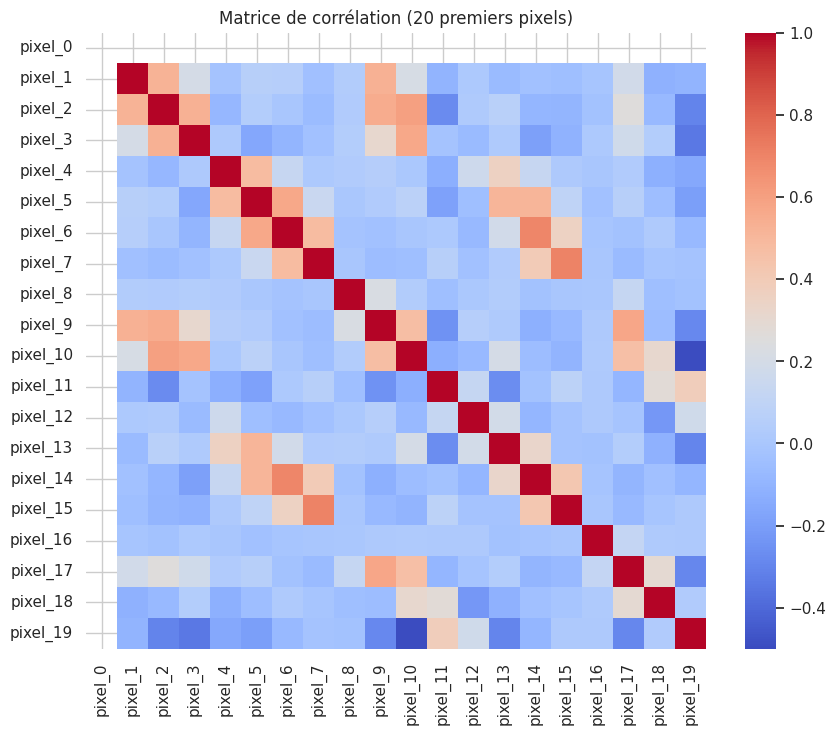


6. Séparation effectuée :
   Entraînement : 1437 échantillons
   Test        : 360 échantillons

7. Entraînement du modèle (Random Forest Classifier)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> Accuracy Score : 96.67%

   >>> Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.95      0.97      0.96        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.89      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted

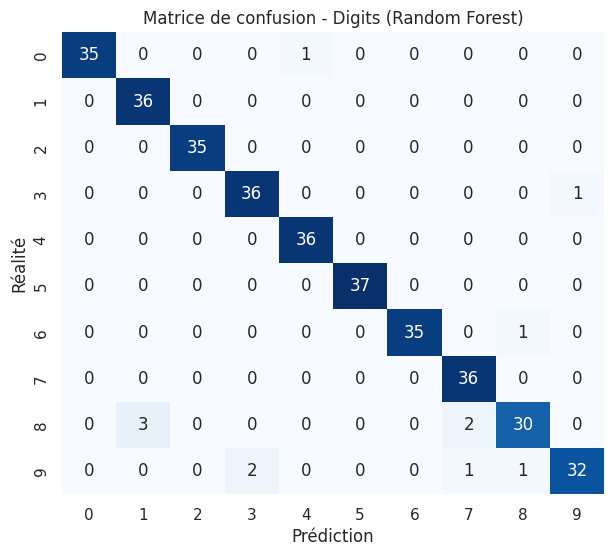


--- FIN DU SCRIPT ---


In [2]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE)
# Dataset : Digits (chiffres manuscrits 8x8 de Scikit-Learn)
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')  # Pour garder la sortie propre

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
# Chargement du dataset Digits (images 8x8 de chiffres manuscrits 0–9)
digits = load_digits()  # 1797 échantillons, 64 features par image 8x8 [web:22][web:26]

# Création d’un DataFrame pour les features
X_raw = pd.DataFrame(digits.data, columns=[f"pixel_{i}" for i in range(digits.data.shape[1])])
y_raw = pd.Series(digits.target, name="target")

df = X_raw.copy()
df["target"] = y_raw

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print(f"   Nombre de classes : {len(digits.target_names)} (chiffres {digits.target_names.min()} à {digits.target_names.max()})\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE \"DONNÉES SALES\" (pour l’exercice)
# ------------------------------------------------------------------------------
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42)  # Pour la reproductibilité
df_dirty = df.copy()

# On applique des NaN sur 5% des lignes pour chaque feature (sauf la cible)
feature_cols = df_dirty.columns[:-1]
for col in feature_cols:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

nb_nans = df_dirty.isnull().sum().sum()
print(f"   Nombre total de valeurs manquantes générées : {nb_nans}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...")

# Séparation Features (X) et Target (y) AVANT le nettoyage
X = df_dirty.drop("target", axis=1)
y = df_dirty["target"]

# Imputation : remplacement des NaN par la moyenne de chaque colonne
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Remise en DataFrame
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...")

# A. Statistiques descriptives sur quelques pixels
print("   Statistiques descriptives (premiers 10 pixels) :")
print(X_clean.iloc[:, :10].describe())

# B. Visualisation 1 : Quelques images de chiffres
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label : {digits.target[i]}")
    plt.axis("off")
plt.suptitle("Exemples d'images du dataset Digits", fontsize=14)
plt.tight_layout()
plt.show()

# C. Visualisation 2 : Distribution d’un pixel caractéristique selon la classe
plt.figure(figsize=(10, 5))
feature_to_plot = "pixel_20"  # par exemple, un pixel central
sns.histplot(
    data=df_dirty,
    x=feature_to_plot,
    hue="target",
    kde=True,
    element="step",
    stat="density",
    common_norm=False
)
plt.title(f"Distribution de '{feature_to_plot}' selon le chiffre cible")
plt.show()

# D. Visualisation 3 : Matrice de corrélation sur un sous-ensemble de pixels
plt.figure(figsize=(10, 8))
corr_subset = X_clean.iloc[:, :20].corr()
sns.heatmap(corr_subset, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation (20 premiers pixels)")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # pour garder un équilibre des classes [web:29]
)

print("\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test        : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Classifier)...")

# Initialisation du modèle (adapté aux problèmes multi-classes) [web:33][web:30]
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Entraînement
model.fit(X_train, y_train)
print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# A. Accuracy (Précision globale)
acc = accuracy_score(y_test, y_pred)
print(f"   >>> Accuracy Score : {acc*100:.2f}%")

# B. Rapport détaillé
print("\n   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in digits.target_names]))

# C. Matrice de confusion visuelle
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=digits.target_names,
    yticklabels=digits.target_names
)
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion - Digits (Random Forest)")
plt.show()

print("\n--- FIN DU SCRIPT ---")